In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from importlib import reload

#ignore warnings
#import warnings
#warnings.filterwarnings("ignore")

import wrangle as w
import explore as e

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = w.get_health_data('Record', 'export 2023.01.20.xml')

/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:30: DtypeWarning: Columns (2,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [4]:
records = w.clean_records_list(df)

In [54]:
time_fixed_records = w.records_list_time_zone_fun(records)

/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['activity_start_time'].dt.strftime('%Y/%m/%d')
/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['activity_start_time'].dt.strftime('%Y/%m/%d')
/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = df['activity_start_time'].dt.strftime('%H:%M')
/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_time'] = df['activity_end_time'].dt.strftime('%H:%M')
/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [6]:
sleep_analysis = records[records.activity_type=='SleepAnalysis']

In [8]:
sleep_analysis['value'] = sleep_analysis['value'].str.replace('HKCategoryValueSleepAnalysis', '')

/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_5190/650466223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_analysis['value'] = sleep_analysis['value'].str.replace('HKCategoryValueSleepAnalysis', '')


In [11]:
watch_sleep_analysis = sleep_analysis[sleep_analysis.source == 'Mark的Apple\xa0Watch']

In [13]:
watch_sleep_analysis['creation_time'] = pd.to_datetime(watch_sleep_analysis['creation_time'])
watch_sleep_analysis['activity_start_time'] = pd.to_datetime(watch_sleep_analysis['activity_start_time'])
watch_sleep_analysis['activity_end_time'] = pd.to_datetime(watch_sleep_analysis['activity_end_time'])
watch_sleep_analysis = watch_sleep_analysis.set_index('creation_time').sort_index()

/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_5190/4100807146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_sleep_analysis['creation_time'] = pd.to_datetime(watch_sleep_analysis['creation_time'])
/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_5190/4100807146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_sleep_analysis['activity_start_time'] = pd.to_datetime(watch_sleep_analysis['activity_start_time'])
/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel

In [16]:
watch_sleep_analysis = w.add_times(watch_sleep_analysis)

In [32]:
watch_sleep_analysis_for_addition = watch_sleep_analysis[(watch_sleep_analysis.value != 'InBed') & (watch_sleep_analysis.value.notnull()) ]






In [34]:
watch_sleep_analysis_for_addition['2023-1-20':]

,activity_type,source,source_ver,unit_of_measure,activity_start_time,activity_end_time,value,device,start_time,end_time,total_time
creation_time,,,,,,,,,,,
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 21:57:44-06:00,2023-01-19 22:15:14-06:00,AsleepCore,NaN,21:57,22:15,0 days 00:17:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 22:15:14-06:00,2023-01-19 22:41:44-06:00,AsleepDeep,NaN,22:15,22:41,0 days 00:26:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 22:41:44-06:00,2023-01-19 22:42:14-06:00,AsleepCore,NaN,22:41,22:42,0 days 00:00:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 22:42:14-06:00,2023-01-19 22:42:44-06:00,Awake,NaN,22:42,22:42,0 days 00:00:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 22:42:44-06:00,2023-01-19 23:35:44-06:00,AsleepCore,NaN,22:42,23:35,0 days 00:53:00
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-19 23:35:44-06:00,2023-01-20 00:17:44-06:00,AsleepREM,NaN,23:35,00:17,0 days 00:42:00
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-20 00:17:44-06:00,2023-01-20 00:56:14-06:00,AsleepCore,NaN,00:17,00:56,0 days 00:38:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-20 00:56:14-06:00,2023-01-20 01:01:44-06:00,AsleepDeep,NaN,00:56,01:01,0 days 00:05:30
2023-01-20 06:31:32-06:00,SleepAnalysis,Mark的Apple Watch,9.2,NaN,2023-01-20 01:01:44-06:00,2023-01-20 01:02:44-06:00,AsleepCore,NaN,01:01,01:02,0 days 00:01:00


In [48]:
watch_sleep_analysis_for_graph = watch_sleep_analysis_for_addition.resample('d')[['total_time']].sum()

In [39]:
watch_sleep_analysis_for_graph['total_time'] = round(watch_sleep_analysis_for_graph['total_time'].dt.total_seconds()/60/60,2)

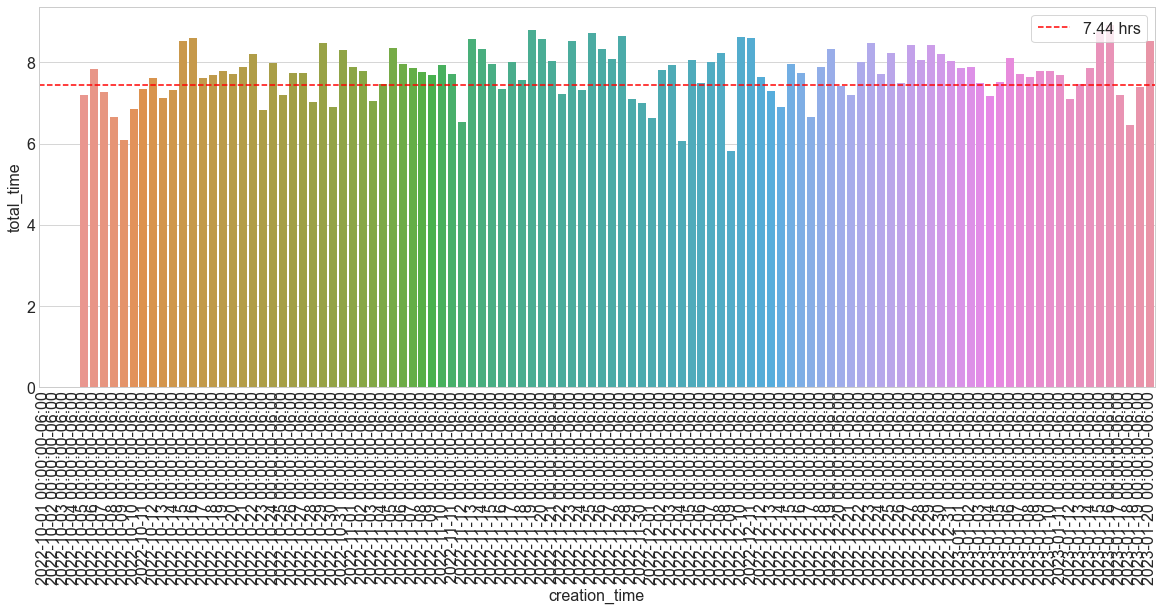

In [45]:
mean = watch_sleep_analysis_for_graph['2022-10':].total_time.mean()
sns.barplot(x = watch_sleep_analysis_for_graph['2022-10':].index, y='total_time', data=watch_sleep_analysis_for_graph['2022-10':])
plt.axhline(mean, color = 'r', linestyle = '--', label=f'{round(mean,2)} hrs')
plt.xticks(rotation=90)
plt.legend(loc = 'upper right', frameon=True)
plt.show()

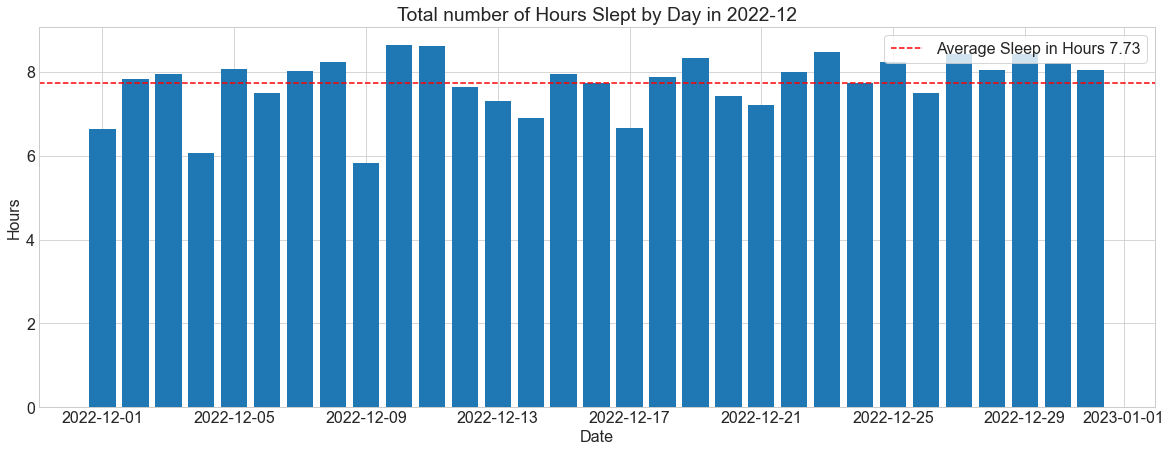

In [51]:
e.plot_sleep_hours(watch_sleep_analysis_for_graph, year=2022, month=12)

In [56]:
e.plot_sleep_hours(daily_info)

AttributeError: 'DataFrame' object has no attribute 'total_time'

In [57]:
daily_info = w.get_daily_info(time_fixed_records)

In [11]:
daily_info['2022'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: D
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steps            365 non-null    float64
 1   distance_walked  365 non-null    float64
 2   weight           365 non-null    float64
 3   resting_hr       365 non-null    float64
 4   exercise_time    365 non-null    float64
 5   calorie_intake   117 non-null    float64
 6   stand_time       365 non-null    float64
 7   VO2Max           365 non-null    float64
 8   walking_hr       358 non-null    float64
 9   sleep_hrs        293 non-null    float64
dtypes: float64(10)
memory usage: 31.4 KB


/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_2672/895405637.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  daily_info['2022'].info()


In [13]:
cols = list(daily_info.columns)
cols.remove('sleep_hrs')

/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_2672/1870282959.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(daily_info['2022'][col])
/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_2672/1870282959.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mean = daily_info['2022'][col].mean()


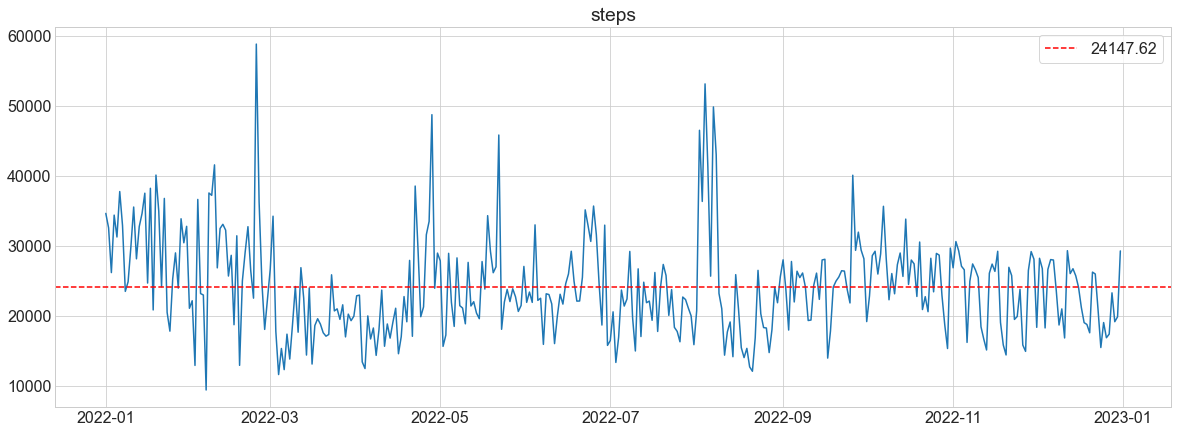

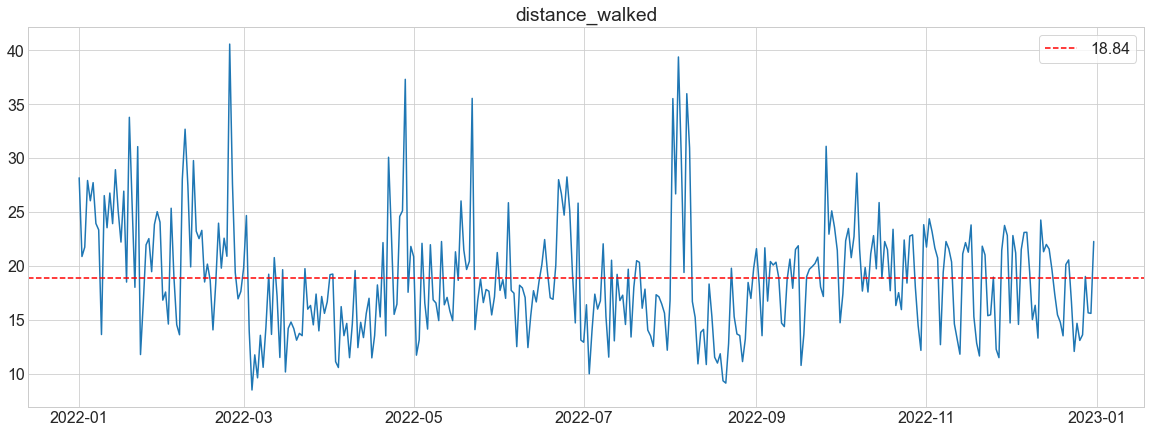

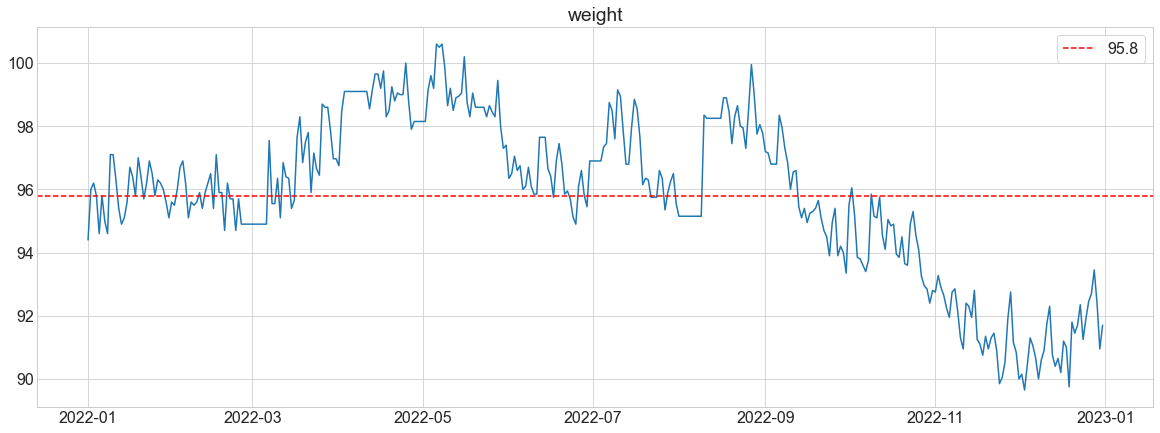

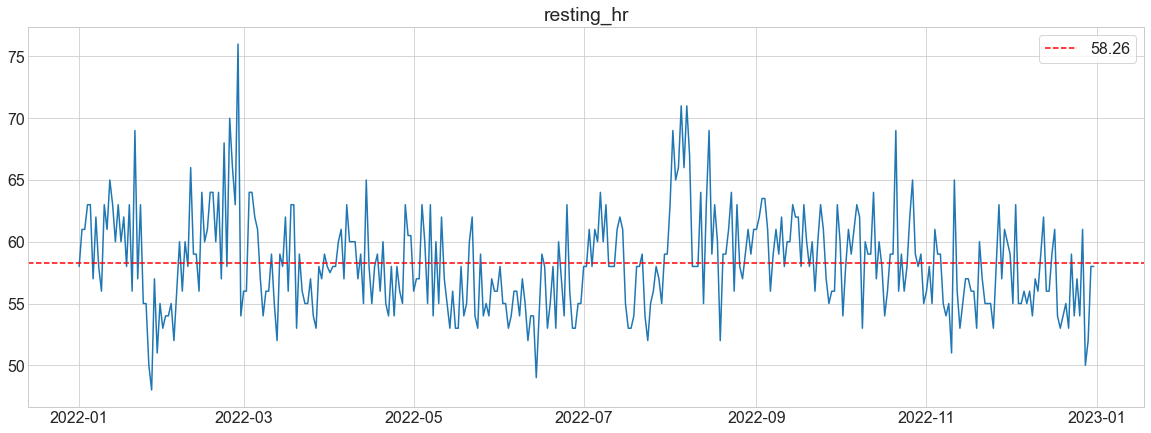

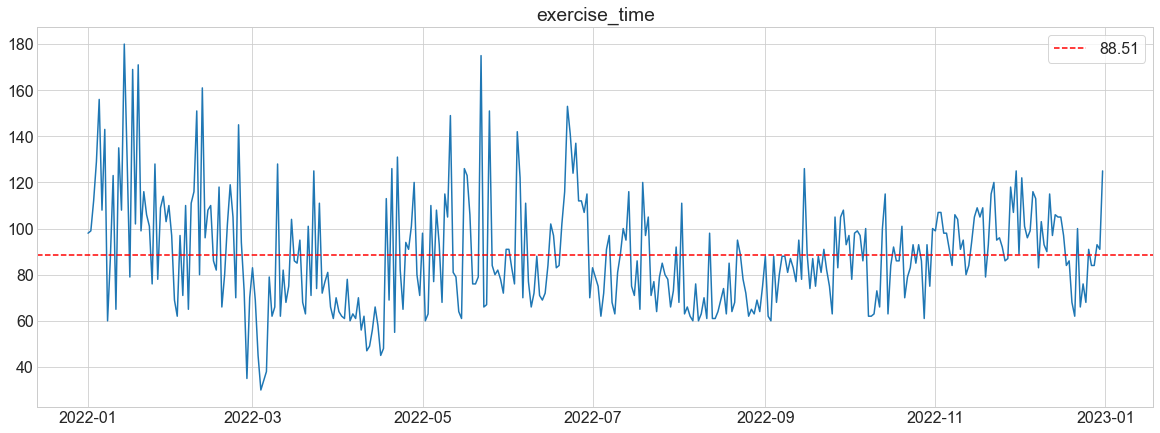

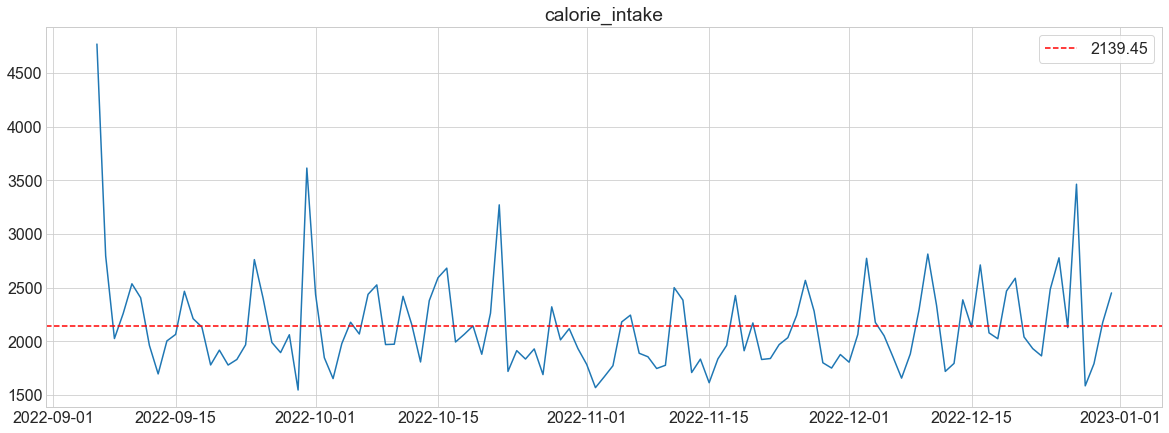

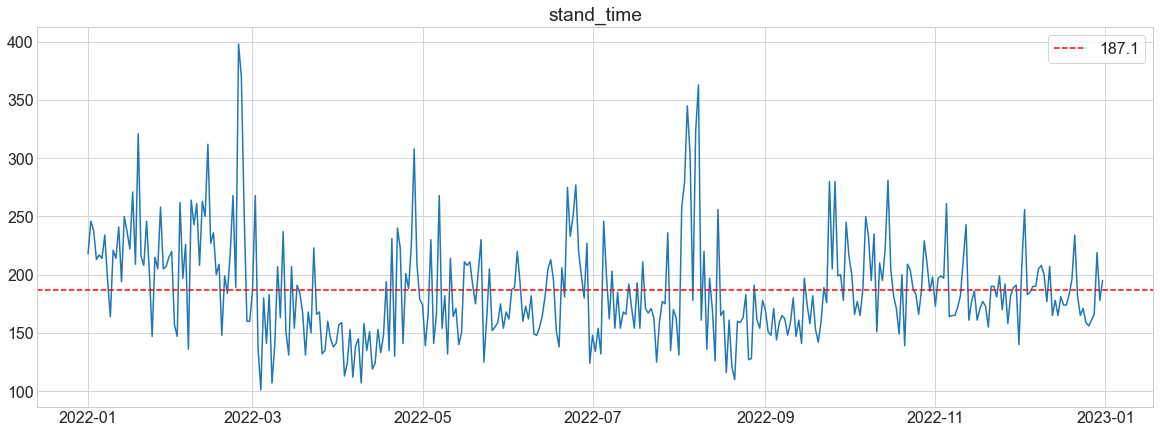

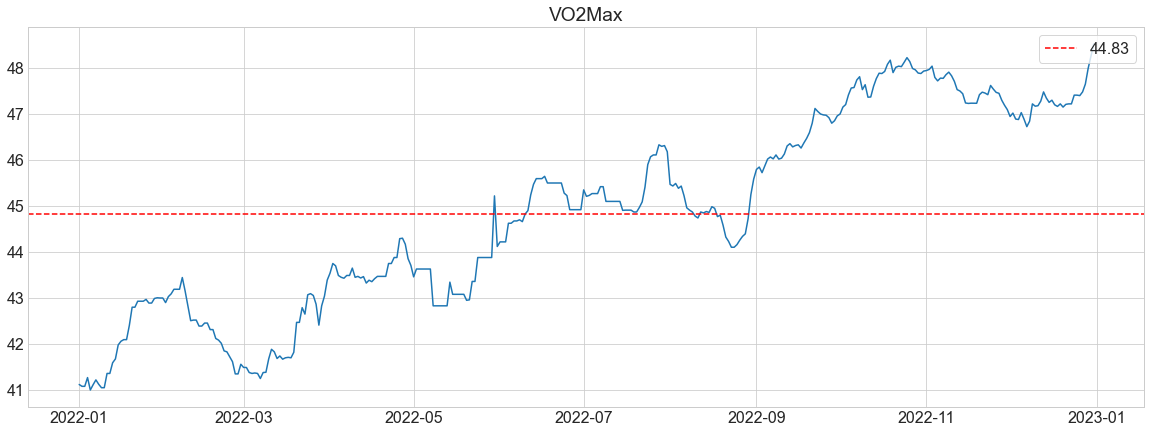

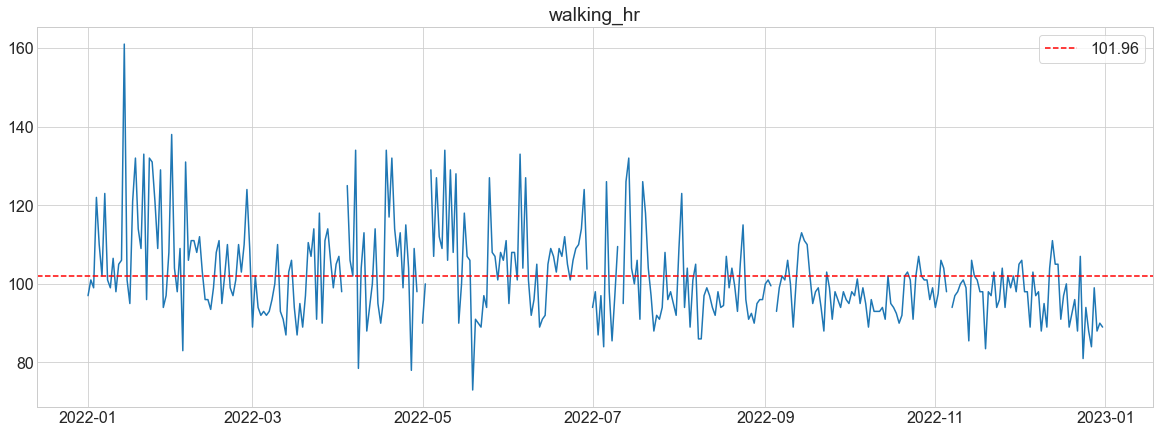

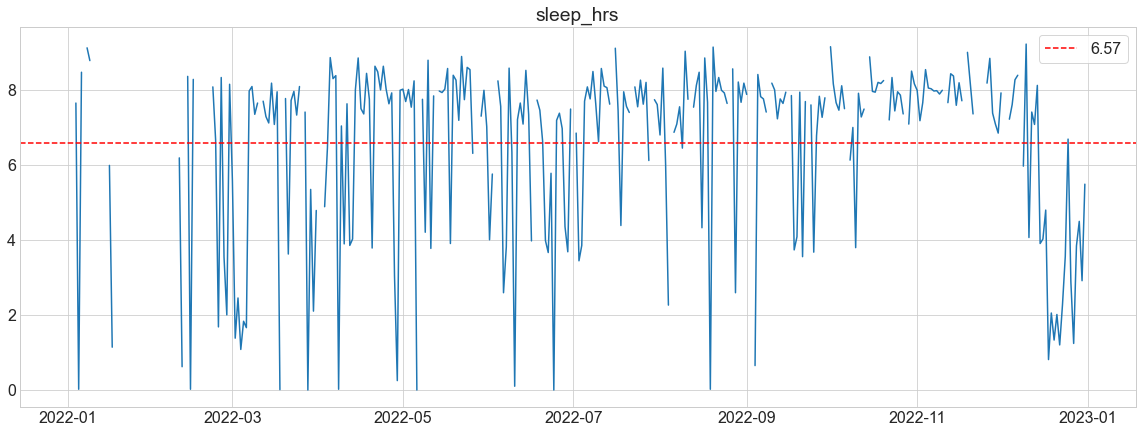

In [16]:
for col in daily_info.columns:
    plt.plot(daily_info['2022'][col])
    plt.title(f'{col}')
    mean = daily_info['2022'][col].mean()
    plt.axhline(mean, color = 'r', linestyle = '--', label=f'{round(mean,2)}')
    plt.legend(loc = 'upper right', frameon=True)
    plt.show()

/Users/fostermark/codeup-data-science/my_apple_health/explore.py:76: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df[f"{year}"]


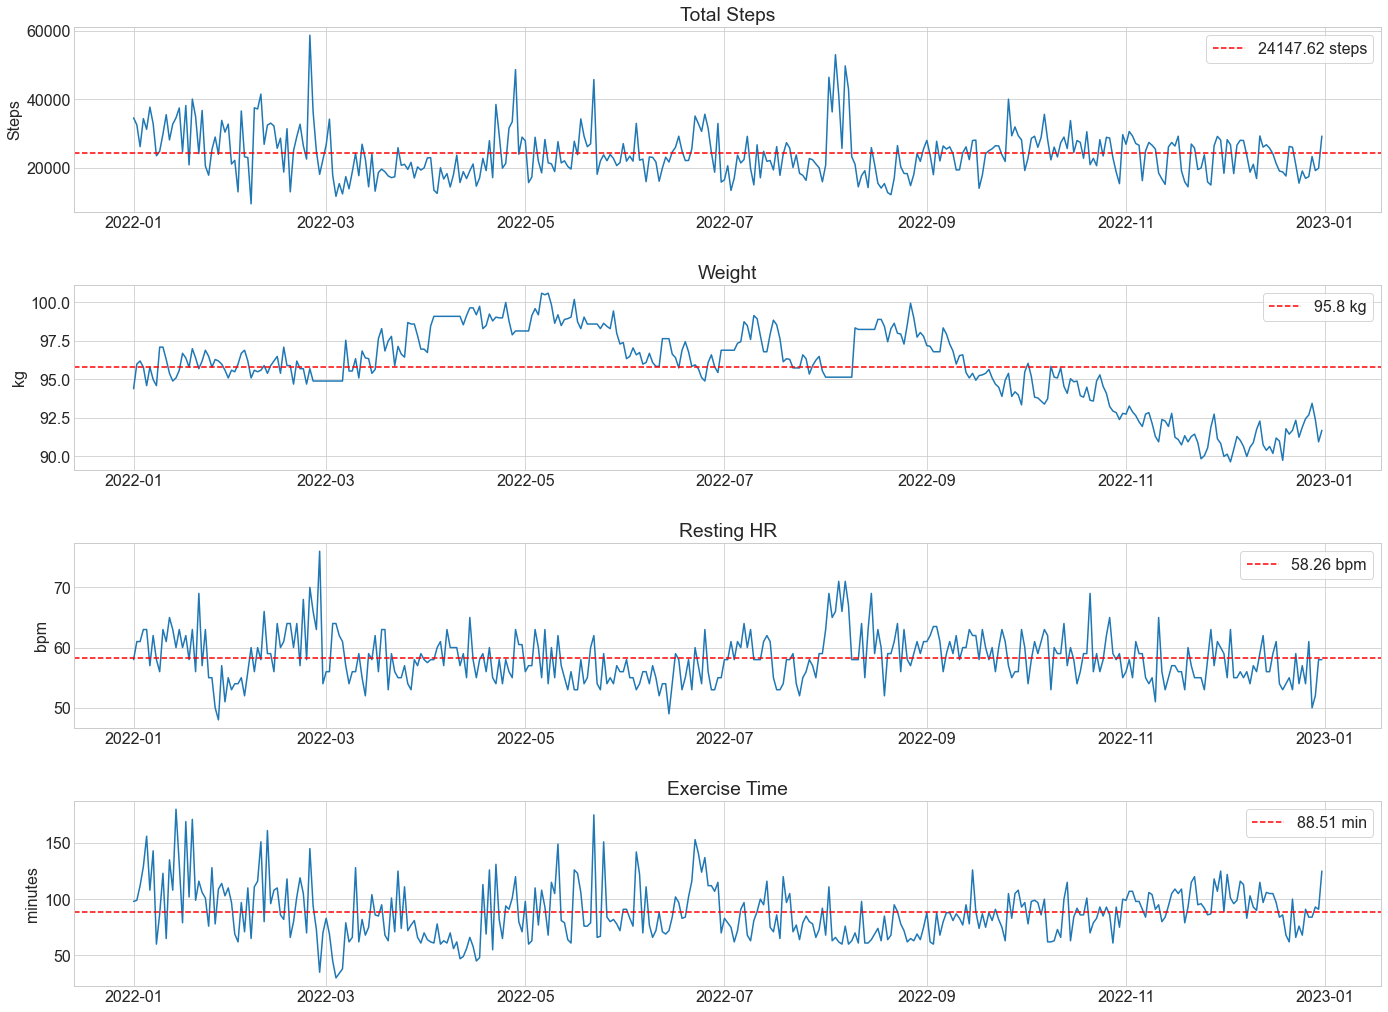

In [19]:
e.show_daily_viz(daily_info, year=2022)

In [62]:
sleep_analysis = records[records.activity_type=='SleepAnalysis']

In [119]:
all_sleep_watch = sleep_analysis[sleep_analysis.source == 'Mark的Apple\xa0Watch']

In [120]:
all_sleep_watch.value.unique()

array(['HKCategoryValueSleepAnalysisAsleepUnspecified',
       'HKCategoryValueSleepAnalysisAsleepCore',
       'HKCategoryValueSleepAnalysisAsleepDeep',
       'HKCategoryValueSleepAnalysisAsleepREM',
       'HKCategoryValueSleepAnalysisAwake',
       'HKCategoryValueSleepAnalysisInBed'], dtype=object)

In [122]:
all_sleep_watch[all_sleep_watch.value != 'HKCategoryValueSleepAnalysisAsleepUnspecified' ]

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-10-04,SleepAnalysis,Mark的Apple Watch,9.0,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,22:40,22:49,0 days 00:08:30
2022-10-04,SleepAnalysis,Mark的Apple Watch,9.0,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,21:46,22:00,0 days 00:14:30
2022-10-04,SleepAnalysis,Mark的Apple Watch,9.0,NaN,HKCategoryValueSleepAnalysisAsleepDeep,NaN,0,22:00,22:19,0 days 00:18:30
2022-10-04,SleepAnalysis,Mark的Apple Watch,9.0,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,22:19,22:24,0 days 00:05:30
2022-10-04,SleepAnalysis,Mark的Apple Watch,9.0,NaN,HKCategoryValueSleepAnalysisAsleepDeep,NaN,0,22:24,22:40,0 days 00:16:00
...,...,...,...,...,...,...,...,...,...,...
2023-01-20,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,01:04,01:46,0 days 00:41:30
2023-01-20,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisAsleepREM,NaN,0,01:46,02:11,0 days 00:25:30
2023-01-20,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisAsleepCore,NaN,0,02:11,03:12,0 days 01:01:00


In [116]:
sleep_analysis['2022-12-29':'2022-12-29'][sleep_analysis['2022-12-29':'2022-12-29'].value == 'HKCategoryValueSleepAnalysisInBed']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-12-29,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,23:31,06:21,0 days 06:50:00
2022-12-29,SleepAnalysis,Marky Doug,16.1.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,23:24,07:45,0 days 08:20:33
2022-12-29,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,01:44,02:37,0 days 00:53:00
2022-12-29,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,00:26,01:43,0 days 01:17:30
2022-12-29,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,02:37,07:42,0 days 05:04:30


In [103]:
sleep_test = sleep_analysis[sleep_analysis.value == 'HKCategoryValueSleepAnalysisInBed']

In [108]:
sleep_test.source.unique()

array(['时钟', '小米运动', 'Marky Doug', 'Mark的Apple\xa0Watch'], dtype=object)

In [105]:
sleep_phone = sleep_test[sleep_test.source == 'Marky Doug']
sleep_phone

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2021-03-01,SleepAnalysis,Marky Doug,14.4,NaN,HKCategoryValueSleepAnalysisInBed,NaN,1,23:15,07:32,0 days 08:17:26
2021-03-02,SleepAnalysis,Marky Doug,14.4,NaN,HKCategoryValueSleepAnalysisInBed,NaN,1,23:15,08:10,0 days 08:55:10
2021-03-02,SleepAnalysis,Marky Doug,14.4,NaN,HKCategoryValueSleepAnalysisInBed,NaN,1,07:54,07:57,0 days 00:03:35
2021-03-02,SleepAnalysis,Marky Doug,14.4,NaN,HKCategoryValueSleepAnalysisInBed,NaN,1,07:37,07:38,0 days 00:00:46
2021-03-03,SleepAnalysis,Marky Doug,14.4,NaN,HKCategoryValueSleepAnalysisInBed,NaN,1,23:15,08:02,0 days 08:47:53
...,...,...,...,...,...,...,...,...,...,...
2023-01-15,SleepAnalysis,Marky Doug,16.1.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,21:55,06:45,0 days 08:50:16
2023-01-16,SleepAnalysis,Marky Doug,16.1.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,22:25,06:00,0 days 07:35:17
2023-01-17,SleepAnalysis,Marky Doug,16.1.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,23:22,06:00,0 days 06:37:30


In [106]:
sleep_watch = sleep_test[sleep_test.source == 'Mark的Apple\xa0Watch']

In [107]:
sleep_watch

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-12-15,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,22:12,22:24,0 days 00:12:00
2022-12-15,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,22:26,23:23,0 days 00:57:30
2022-12-15,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,23:24,05:52,0 days 06:28:00
2022-12-16,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,23:19,04:32,0 days 05:13:30
2022-12-16,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,05:55,05:57,0 days 00:01:30
...,...,...,...,...,...,...,...,...,...,...
2023-01-19,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,21:57,22:42,0 days 00:44:30
2023-01-19,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,22:42,01:02,0 days 02:20:00
2023-01-20,SleepAnalysis,Mark的Apple Watch,9.2,NaN,HKCategoryValueSleepAnalysisInBed,NaN,0,03:13,04:53,0 days 01:40:00


In [92]:
sleep_test['total_time'] = round(sleep_test['total_time'].dt.total_seconds()/60/60,2)

In [35]:
sleep = daily_info[['sleep_hrs']]

In [36]:
sleep = sleep.dropna()

In [94]:
sleep_test

,total_time
date,
2022-12-15,7.62
2022-12-16,5.25
2022-12-17,6.22
2022-12-18,4.06
2022-12-19,10.27
2022-12-20,6.65
2022-12-21,6.04
2022-12-22,8.39
2022-12-23,13.64


In [93]:
sleep_2022 = sleep_test['2022-11']

KeyError: '2022-11'

In [ ]:
sns.barplot(x = sleep_2022.index, y='total_time', data=sleep_2022)
plt.xticks(rotation=90)
plt.show()

In [27]:
daily_info

,steps,distance_walked,weight,resting_hr,exercise_time,calorie_intake,stand_time,VO2Max,walking_hr,sleep_hrs
date,,,,,,,,,,
2015-10-10 00:00:00,5480.0,3.524410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-11 00:00:00,12836.0,9.079140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-12 00:00:00,16111.0,10.154960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-13 00:00:00,11130.0,7.531840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-14 00:00:00,8691.0,6.156990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-17 00:00:00,27958.0,22.406966,92.90,62.0,101.0,1734.2863,178.0,48.585,97.0,2.39
2023-01-18 00:00:00,27813.0,22.218563,91.25,59.0,99.0,1866.1293,186.0,48.720,100.0,3.24
2023-01-19 00:00:00,23768.0,19.078564,90.90,55.0,81.0,1935.8973,150.0,48.760,106.0,3.89


In [10]:
VO2Max = records[records.activity_type=='VO2Max']

In [11]:
VO2Max['2022-11']

,activity_type,source,source_ver,unit_of_measure,value,device,in_china,start_time,end_time,total_time
date,,,,,,,,,,
2022-11-01,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.97,NaN,0,12:25,12:25,0 days
2022-11-01,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.92,NaN,0,05:54,05:54,0 days
2022-11-02,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.0,NaN,0,12:17,12:17,0 days
2022-11-02,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.94,NaN,0,05:46,05:46,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,47.89,NaN,0,15:10,15:10,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.1,NaN,0,05:51,05:51,0 days
2022-11-03,VO2Max,Mark的Apple Watch,2775.1.6,mL/min·kg,48.13,NaN,0,12:30,12:30,0 days
2022-11-04,VO2Max,Mark的Apple Watch,2780.0.16.1.4,mL/min·kg,47.72,NaN,0,12:19,12:19,0 days
2022-11-04,VO2Max,Mark的Apple Watch,2780.0.16.1.4,mL/min·kg,47.87,NaN,0,05:50,05:50,0 days


In [12]:
AppleStandTime = records[records.activity_type=='AppleStandTime']

In [13]:
AppleStandTime['2022-11'].resample('D').value.sum()

date
2022-11-01    173.0
2022-11-02    197.0
2022-11-03    199.0
2022-11-04    197.0
2022-11-05    261.0
2022-11-06    164.0
2022-11-07    165.0
2022-11-08    165.0
2022-11-09    172.0
2022-11-10    182.0
2022-11-11    213.0
2022-11-12    243.0
2022-11-13    161.0
2022-11-14    177.0
2022-11-15    186.0
2022-11-16    161.0
2022-11-17    171.0
2022-11-18    177.0
2022-11-19    173.0
2022-11-20    155.0
2022-11-21    190.0
2022-11-22    190.0
2022-11-23    181.0
2022-11-24    199.0
2022-11-25    170.0
2022-11-26    192.0
2022-11-27    158.0
2022-11-28    182.0
2022-11-29    189.0
2022-11-30    191.0
Freq: D, Name: value, dtype: object

In [14]:
sleep_info = records[records.activity_type=='SleepAnalysis']

In [15]:
inbed_time = sleep_info[sleep_info.value == 'HKCategoryValueSleepAnalysisInBed']

In [33]:
inbed_time.resample('d').total_time.sum()

date
2016-10-10   0 days 08:45:50
2016-10-11   0 days 04:48:56
2016-10-12   0 days 11:17:19
2016-10-13   0 days 08:12:36
2016-10-14   0 days 00:05:22
                   ...      
2022-12-03   0 days 00:00:00
2022-12-04   0 days 14:25:13
2022-12-05   0 days 07:36:12
2022-12-06   0 days 08:15:34
2022-12-07   0 days 08:22:50
Freq: D, Name: total_time, Length: 2250, dtype: timedelta64[ns]

In [18]:
w.in_bed_time(records)

,total_time
date,
2016-10-10,8.763889
2016-10-11,4.815556
2016-10-12,8.383056
2016-10-12,0.143333
2016-10-12,0.143333
...,...
2022-12-04,8.213056
2022-12-04,6.207222
2022-12-05,7.603333


In [19]:
records[records.activity_type=='VO2Max'].resample('d')[['value']].mean()

,value
date,
2021-11-01,45.490000
2021-11-02,43.850000
2021-11-03,43.370000
2021-11-04,NaN
2021-11-05,43.630000
...,...
2022-12-04,46.880000
2022-12-05,47.030000
2022-12-06,46.886667


In [31]:
records[records.activity_type=='DistanceWalkingRunning'].resample('d')[['value']].sum()

,value
date,
2015-10-10,3.524410
2015-10-11,9.079140
2015-10-12,10.154960
2015-10-13,7.531840
2015-10-14,6.156990
...,...
2022-12-04,14.567372
2022-12-05,21.517772
2022-12-06,23.098255


In [82]:
WalkingStepLength = records[records.activity_type=='WalkingStepLength']

In [84]:
WalkingStepLength['value'] = WalkingStepLength.value.astype(float)

<AxesSubplot:xlabel='date'>

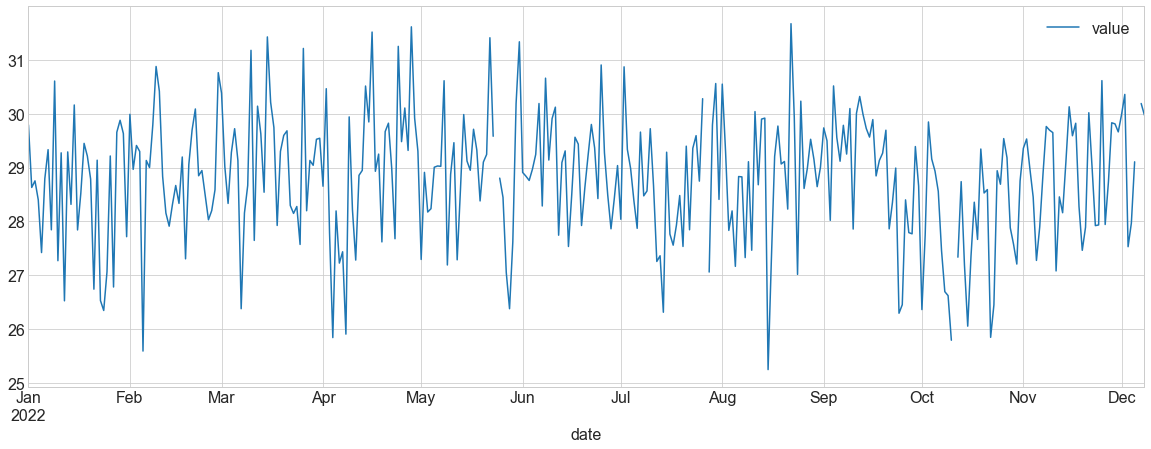

In [87]:
WalkingStepLength['2022'].resample('d')[['value']].mean().plot()

In [91]:
reload(w)

<module 'wrangle' from '/Users/fostermark/codeup-data-science/my_apple_health/wrangle.py'>

In [92]:
w.in_bed_time(records)

,total_time
date,
2016-10-10,8.76
2016-10-11,4.82
2016-10-12,11.29
2016-10-13,8.21
2016-10-14,0.09
...,...
2022-12-03,0.00
2022-12-04,14.42
2022-12-05,7.60
